### Data set of Pima Indians Diabetes:
All the inputs attributes are numeric and the output variable to be predicted is binary ( 0 or 1)
This dataset is whether or not each patients will have an onset of diabetes within 5 years.

Source of dataset: UCI Machine learning Repository

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Preprocessing:
#### First see the statistics of data to understand and question yourself
To get the best result we should understand dataset.
1. Take a peek at your raw data.
2. Review the dimensions of your dataset.
3. Review the data types of attributes in your data.
4. Summarize the distribution of instances across classes in your dataset.
5. Summarize your data using descriptive statistics.
6. Understand the relationships in your data using correlations.
7. Review the skew of the distributions of each attribute.


In [3]:
#1 : Peak Data:
filename="pima-indians-diabetes.data.csv"
names=['preg','plas','pres','skin','test','mass','pedi','age','class']
data=pd.read_csv(filename,names=names)
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape  # gives the shape   9 columns

(768, 9)

In [8]:
types= data.dtypes   # gives the data type for each attributes
print(types)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
data.describe()   # descriptive statistics

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
## Class distribution( classification only): Check for imbalanced problems
class_count=data.groupby('class').size()
print(class_count)

class
0    500
1    268
dtype: int64

In [13]:
# above clearly show the class '0' is nearly double. No class imbalance

In [14]:
## Correlations between Attributes:
# Some of the Machine learning Algorithm like linear and logistic regression
# suffers a lot if there is highly correalted atributes in dataset.
correlations=data.corr(method='pearson')  # most common correaltion is 
# Pearson correlation cofficient that assumes the a normal distribution
# of the attributes involved in dataset
print(correlations)

# +1 shows full positive correlation and -1 shows a full negative

           preg      plas      pres      skin      test      mass      pedi  \
preg   1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683 -0.033523   
plas   0.129459  1.000000  0.152590  0.057328  0.331357  0.221071  0.137337   
pres   0.141282  0.152590  1.000000  0.207371  0.088933  0.281805  0.041265   
skin  -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573  0.183928   
test  -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859  0.185071   
mass   0.017683  0.221071  0.281805  0.392573  0.197859  1.000000  0.140647   
pedi  -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647  1.000000   
age    0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242  0.033561   
class  0.221898  0.466581  0.065068  0.074752  0.130548  0.292695  0.173844   

            age     class  
preg   0.544341  0.221898  
plas   0.263514  0.466581  
pres   0.239528  0.065068  
skin  -0.113970  0.074752  
test  -0.042163  0.130548  
mass   0.036242  0.292695  
pedi   0.0335

In [15]:
### Skew of Univariate Distribution:
# skew refers to a distrbution that is assumed Gaussian( normal or bell 
# curve) that is shifted or squashed in one directions. Many ML algoirthm
# assume a Gaussian distrbution. If skew present correct it.
skewness=data.skew()
print(skewness)

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64


In [16]:
# Positive skew (right), Negative skew (left), values close to zero show 
# less skew

#### Understanding Data with Visualization:

#### Univariate Plot
Let's look three techniques to understand each attributes of dataset independently
 - HISTOGRAM
 - DENSITY PLOTS
 - BOX AND WHISKER PLOTS

In [18]:
import matplotlib.pyplot as plt

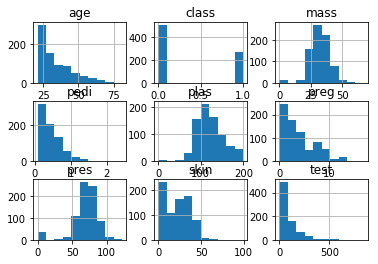

In [19]:
# Histograms:
data.hist()
plt.show()
# this can help to see possible outliers, Gaussian, skewed or even exponenital distribution

In [20]:
# from above histogram, 
# i) age, pedi and test show the exponential distribution
# ii) mass, pres and plas attributes nearly Gaussian distribution

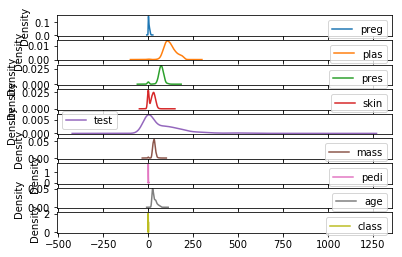

In [28]:
# Density Plots: another way of getting quick idea of the distribution of each attributes.
# plots look like an abstracted histogram with a smooth curve drawn through the top of each bin.
data.plot(kind='density',subplots=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FEF0EA4F98>,
      dtype=object)

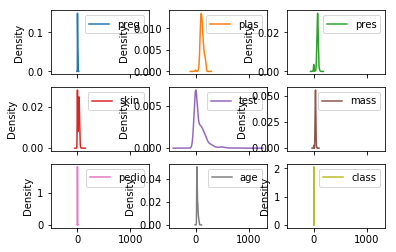

In [24]:
data.plot(kind='density',subplots=True,layout=(3,3))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FEF117FA58>,
      dtype=object)

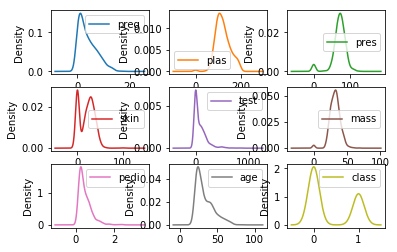

In [25]:
data.plot(kind='density',subplots=True,layout=(3,3),sharex=False)   # this the density plot
plt.show()

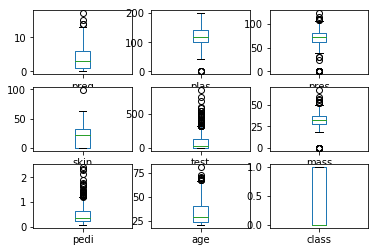

In [29]:
## Box and Whisker Plots (Boxplots): Another way to see distribution of each attribute
# Boxplot is, drawing a line for the median(middle value) and a box around the 25th and 75th percentiles(the middle
# 50% of the data). The whisker give and idea of the spread of the data and dots outside of the whiskers show 
# candidate outlier values(values that are 1.5 times greater than the size of spread of the middle 50% of the data)
data.plot(kind='box',subplots=True, layout=(3,3), sharex=False)
plt.show()

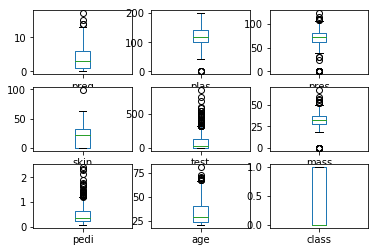

In [30]:
data.plot(kind='box',subplots=True, layout=(3,3), sharex=False,sharey=False)
plt.show()
#differnt attributes shows different results. some like age,test and skin apper quite skewed towards smaller value

### Multivariate plots: we'll see two plots
  - Correlation Matrix Plot
  - Scatter plot matrix

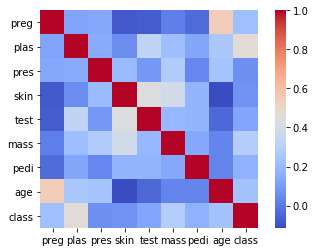

In [33]:
#i) Correlation Matrix Plot:
# correlation gives an indication of how related the changes are between two variables.
# If two varibles change in the same direction they are positively correlated.
# If they change in opposite directions together(one goes up,one goes down), then they are negatively correlated.
# This correlation matrix is useful to know, because some machine learning algorithms like linear and 
# logistic regression can have poor performance if there are highly correlated input variable in data.
correlations=data.corr()
import seaborn as sns
sns.heatmap(correlations,cmap='coolwarm',square=True)
plt.show()

NameError: name 'numpy' is not defined

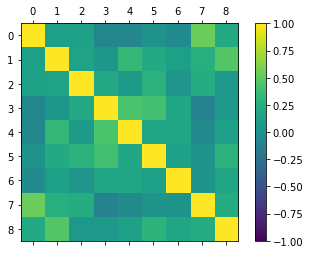

In [34]:
# or
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1, vmax=1)
fig.colorbar(cax)
ticks=numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)  # names=['preg,'plas',......... 'class']
ax.set_yticklabels(names)
plt.show()

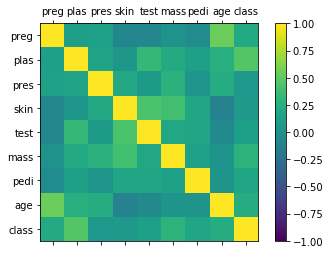

In [36]:
# or
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1, vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)  # names=['preg,'plas',......... 'class']
ax.set_yticklabels(names)
plt.show()

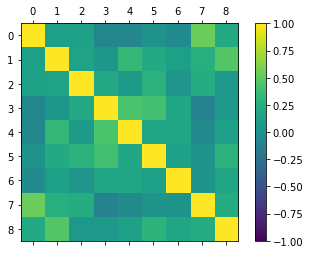

In [37]:
# if ticks are not written then,
# or
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1, vmax=1)
fig.colorbar(cax)

plt.show()

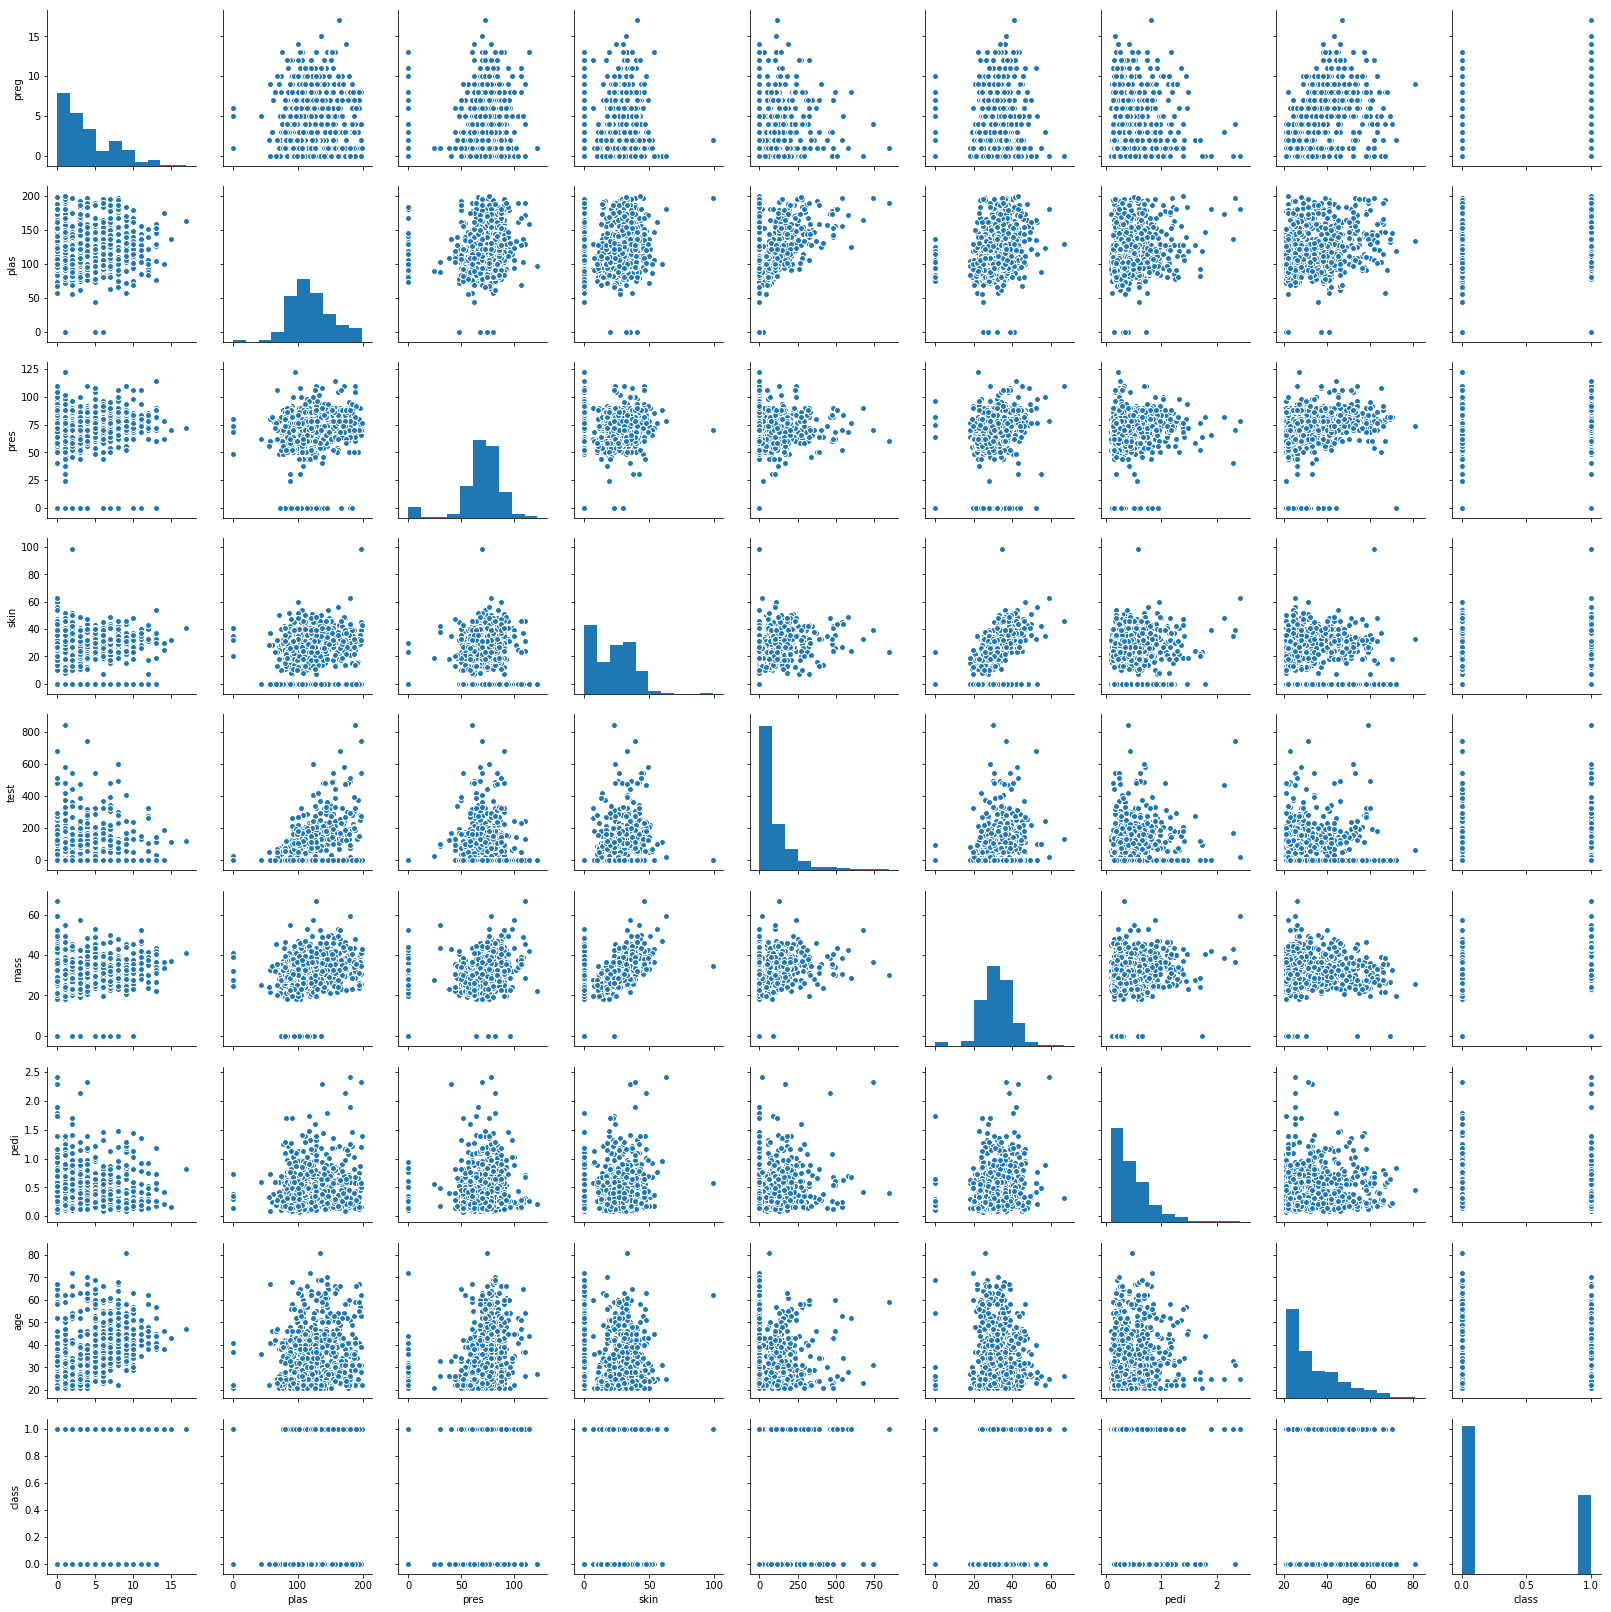

In [43]:
##### Scatter plot Matrix: 
#A scatter plot shows the relationship between two variables as dots in two dimensions, one axis for each attribute
#scatter plots are usefulfor spotting structured relationships between variables,like whether we could summarize
# the relationship between two variables with a line. Attributes with structured realtionships may also be
# correalted and good candidates for removal form or dataset
sns.pairplot(data)
plt.show()

##### Preprocessing
 It is required steps:
 Follows the some rules and prepare data for better performance in machine learning algorithms. There are different like
 - Rescale data
 - Standardize data
 - Normalize data
 - Binarize data.
 Let's see one by one, and use what the problem what your datset requires

In [7]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
##Rescale Data:
# When the data is comprised of attributes with varying scales, we can rescale the attributes to all have the
# same scale. Often it is referred to as normalization and attributes are often rescaled into the range between
# 0 and 1. This is useful for optimization algorithms used in the core of machine learning algorithms like 
# gradient descent.Also, useful for algorithms that weight inputs like regression and nerual networks and 
# algorithms that use distance measures like K-Nearest Neighbors.

In [4]:
#### i) Rescale data:
# Seperate into input and output components:
X=data.drop(columns=['class'])
y=data['class']

In [5]:
X.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [8]:
scaler=MinMaxScaler(feature_range=(0,1))   #This transformation is often used as an alternative to zero mean,
# unit variance scaling.
rescaled_X=scaler.fit_transform(X)
# You call the fit() function to prepare the parameters of the transform once on your data. Then later you can use
#the transform() function on the same data to prepare it for modeling and again on the test or validation dataset 
#or new data that you may see in the future. The Combined Fit-And-Transform is a convenience that you can use for
#one oﬀ tasks. This might be useful if you are interested in plotting or summarizing the transformed data.

In [9]:
# Summarize transformed data:
set_printoptions(precision=3)
# precision : int or None, optional
 #   Number of digits of precision for floating point output (default 8).
print(rescaled_X[0:5,:])    

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


In [10]:
###### Standardize Data:
#Standardization is a useful technique to transform attributes with a Gaussian distribution and diﬀering means and
#standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.It work 
# better with rescaled data, such as linear regression,logistic regression and linear discriminate analysis
from sklearn.preprocessing import StandardScaler

In [11]:
sc=StandardScaler()
standrize=sc.fit_transform(X)
set_printoptions(precision=3)
print(standrize[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


In [12]:
##### Normalize Data:
from sklearn.preprocessing import Normalizer
#Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called a unit norm
# or a vector with the length of 1 in linear algebra). This pre-processing method can be useful for sparse datasets
#(lots of zeros) with attributes of varying scales when using algorithms that weight input values such as neural
#networks and algorithms that use distance measures such as k-Nearest Neighbors.

In [13]:
norm= Normalizer()
normalized_X= norm.fit_transform(X)
set_printoptions(precision=3)
print(standrize[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


In [14]:
###### Binarize Data :
from sklearn.preprocessing import Binarizer
#You can transform your data using a binary threshold. All values above the threshold are marked 1 and all equal 
#to or below are marked as 0. This is called binarizing your data or thresholding your data. It can be useful when
#you have probabilities that you want to make crisp values. It is also useful when feature engineering and you
#want to add new features that indicate something meaningful

In [16]:
binary= Binarizer(threshold=0.0)
binary_X=binary.fit_transform(X)
set_printoptions(precision=3)
print(binary_X[0:5,:]) # vlaues equal or less than 0 are marked as zero(0) and rests value 1.

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


### Feature selections:
Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested. Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression. Three beneﬁts of performing feature selection before modeling your data are:

 Reduces Overﬁtting: Less redundant data means less opportunity to make decisions based on noise.

 Improves Accuracy: Less misleading data means modeling accuracy improves.

 Reduces Training Time: Less data means that algorithms train faster

for more detail: scikit-learn.org/stable/modules/feature_selection.html

In [17]:
### i) Univariate Selection:
#Statistical tests can be used to select those features that have the strongest relationship with
# the output variable. 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2    # chi-squared for classification

In [23]:
X.shape

(768, 8)

In [27]:
# Let use chi-squared test to the samples to retrieve only the four best features 
univariate_Xy=SelectKBest(score_func=chi2,k=4).fit_transform(X,y)
print(univariate_Xy.shape)
set_printoptions(precision=3)
print(univariate_Xy[0:5,:])

(768, 4)
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


In [28]:
# to see the scores of each atribute we have to do
test=SelectKBest(score_func=chi2,k=4)
fit=test.fit(X,y)
print(fit.scores_)
# so those columns that have high value are choosen, here our case we have taken 4 attributes 
# these are plas,test,mass and age.

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]


In [30]:
#### Recursive Feature Elimination:
#The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on 
# those attributes that remain. It uses the model accuracy to identify which attributes (and combination of
# attributes) contribute the most to predicting the target attribute.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [32]:
model=LogisticRegression()   # we are using the logistic regression algorithm here
rfe=RFE(estimator=model,n_features_to_select=3)
fit=rfe.fit(X,y)
print('Number of Features: %d'%fit.n_features_)
print('Selected Features: %s'%fit.support_)
print('Features Ranking: %s'%fit.ranking_)
# The top 3 features are: preg,mass and pedi which can be seen as below.  feature ranking=1 means it is selected.

Number of Features: 3
Selected Features: [ True False False False False  True  True False]
Features Ranking: [1 2 3 5 6 1 1 4]


In [34]:
#### Principal component Analysis(PCA) or Data Reduction Technique:
#Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form.
#Generally this is called a data reduction technique. A property of PCA is that you can choose the number of 
#dimensions or principal components in the transformed result.
from sklearn.decomposition import PCA


In [36]:
pca=PCA(n_components=3,)  # transformed dataset(3 Principal components)
#Principal component analysis (PCA):Linear dimensionality reduction using Singular Value Decomposition of the
#data to project it to a lower dimensional space.It uses the LAPACK implementation of the full SVD or a randomized 
#truncated
#SVD by the method of Halko et al. 2009, depending on the shape of the input
#data and the number of components to extract.
fit=pca.fit(X)
# summarize components
print("Explained variance ratio: %s"% fit.explained_variance_ratio_)  #percentage of variance explained by each of 
#the selected components
print("Explained variance: %s"% fit.explained_variance_) # the amount of variance explained by each of the
# selected components.
print("Principal Axes : %s"%fit.components_)  # principal axes in feature space,representing the directions of 
#maximum variance in the data. The components are sorted by "explained_variance_"
print("singular values: %s"% fit.singular_values_)  # The singular values corresponding to each of the selected
# components.The singular values are equals to the 2-norms of the n_components variables in the lower
# dimensional space.

Explained variance ratio: [0.889 0.062 0.026]
Explained variance: [13456.573   932.76    390.578]
Principal Axes : [[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]
singular values: [3212.661  845.829  547.333]


In [37]:
##### Feature Importance:
#Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features. 
from sklearn.ensemble import ExtraTreesClassifier # This class implements a meta estimator that fits a number of
# randomized decision trees(a.k.a extra-trees) on various sub-samples of the dataset and uses averaging to improve
# the predictive accuracy and control over-fitting.

In [40]:
extra_tree=ExtraTreesClassifier().fit(X,y)
print(extra_tree.feature_importances_)  # returns the feature importance(the higher, the more important feature).
# the below scores suggests: plas,age and mass attributes

print("Estimator: %s" % extra_tree.estimators_)  # the collection of fitted sub-estimators

[0.114 0.241 0.094 0.079 0.072 0.136 0.111 0.153]
Estimator: [ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=908264378,
          splitter='random'), ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=91665112,
          splitter='random'), ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.

### Evaluate Performance of ML with Resampling
You need to know how well your algorithms perform on unseen data. The best way to evaluate
the performance of an algorithm would be to make predictions for new data to which you
already know the answers. The second best way is to use clever techniques from statistics called
resampling methods that allow you to make accurate estimates for how well your algorithm will
perform on new data.We must evaluate our machine learning algorithms on data that is not used to train the algorithm. we look at four different techniques that we can use to split up our training dataset and create useful estimates of performance for our machine learning algorithms:

 Train and Test Sets.

 k-fold Cross-Validation.

 Leave One Out Cross-Validation.

 Repeated Random Test-Train Splits.

##### Split into Train and Test sets:
We can take our original dataset and split it into two parts. Train the algorithm on the first part, make
predictions on the second part and evaluate the predictions against the expected results. The size of the split
can depend on the size and specifics of your dataset, although it is common to use 67% of the data for
training and the remaining 33% for testing. This technique is ideal for large datasets(million of records)

In [16]:
# we have already split the dataset into X and y: Let's see it again:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Seperate into input and output components:
X=data.drop(columns=['class'])
y=data['class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=101) # random_state is random seed
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
model=LogisticRegression()
model.fit(X_train,y_train)
result=model.score(X_test,y_test)
print("Accuracy: %.3f%%" % (result*100.0))   # expressed in percentage

(514, 8) (254, 8) (514,) (254,)
Accuracy: 78.346%


In [ ]:
#Using a train/test split is good for speed when using a slow algorithm and produces
#performance estimates with lower bias when using large datasets.

##### K-fold Cross-validation:
A limitation of using the train and test split method is that you get a noisy estimate of algorithm performance. The k-fold cross-validation method (also called just cross-validation) is a resampling method that provides a more accurate estimate of algorithm performance. It does this by ﬁrst splitting the data into k groups. The algorithm is then trained and evaluated k times and the performance summarized by taking the mean performance score. Each group of data is called a fold, hence the name k-fold cross-validation. It works by ﬁrst training the algorithm on the k-1 groups of the data and evaluating it on the kth hold-out group as the test set. This is repeated so that each of the k groups is given an opportunity to be held out and used as the test set. As such, the value of k should be divisible by the number of rows in your training dataset, to ensure each of the k groups has the same number of rows. Generally, K=3 or 5 for small dataset and k=10 for large dataset, but not hard rule.

In [7]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [15]:
kfold=KFold(n_splits=10,random_state=101)  #we use 10-fold cross validation
model=LogisticRegression()
results=cross_val_score(model,X,y,cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" %(results.mean()*100.0,results.std()*100.0))   # expressed in percentage

Accuracy: 76.951% (4.841%)


##### Leave one out cross-validation(LOOCV):
LOOCV or Leave One Out Cross-Validation. This is a form of k-fold cross-validation where the value of k is ﬁxed 
at 1. A downside is that it can be a computationally more expensive procedure than k-fold cross-validation. 

In [17]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
loocv=LeaveOneOut()
model=LogisticRegression()
results=cross_val_score(model,X,y,cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0,results.std()*100))

Accuracy: 76.953% (42.113%)


In [18]:
# the above results shows Standard deviation(std) has more variance than the K-fold cross-validation.

##### Repeated Random Test-Train splits:
Another variation on k-fold cross-validation is to create a random split of the data like the
train/test split  but repeat the process of splitting and evaluation of the
algorithm multiple times, like cross-validation. This has the speed of using a train/test split and
the reduction in variance in the estimated performance of k-fold cross-validation. You can also
repeat the process many more times as needed to improve the accuracy. A down side is that
repetitions may include much of the same data in the train or the test split from run to run,
introducing redundancy into the evaluation. The example below splits the data into a 67%/33%
train/test split and repeats the process 10 times.

Techniques like leave-one-out cross-validation and repeated random splits can be useful
intermediates when trying to balance variance in the estimated performance, model
training speed and dataset size.



In [19]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [20]:
n_splits = 10
test_size = 0.33
seed = 101
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.890% (1.318%)


#### ML Algorithm Performance Metrics:
The metrics that you choose to evaluate your machine learning algorithms are very important.After you make predictions, you need to know if they are any good. There are standard measures that we can use to summarize how good a set of predictions actually is. Knowing how good a set of predictions is allows you to make estimates about the skill of a given machine learning model of your problem.Let see two metrics:
###### i)Classification Metrics:
###### ii)  Regression Metrics:


##### Classfication Metrics: let see some of the metrics
 Classification Accuracy.

 Logarithmic Loss.

 Area Under ROC Curve.

 Confusion Matrix.

 Classification Report.

In [23]:
####### Classification Accuracy:
# A quick way to evaluate a set of predictions on a classiﬁcation problem is by using accuracy. Classiﬁcation 
#accuracy is a ratio of the number of correct predictions out of all predictions that were made. It is often 
#presented as a percentage between 0% for the worst possible accuracy and 100% for the best possible accuracy.
#                 accuracy =(correct predictions total /predictions) ×100
#It is really only suitable when there are an equal number of observations in each class (which is rarely the case)
#and that all predictions and prediction errors are equally important, which is often not the case. 

# Cross Validation Classification Accuracy
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
kfold = KFold(n_splits=10, random_state=101)
model = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.770 (0.048)


In [24]:
######### Logarithmic Loss: 
#Logarithmic loss (or logloss) is a performance metric for evaluating the predictions of probabilities of 
#membership to a given class. The scalar probability between 0 and 1 can be seen as a measure of confidence for a 
#prediction by an algorithm. Predictions that are correct or incorrect are rewarded or punished proportionally to
#the confidence of the prediction
# Cross Validation Classification LogLoss
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
kfold = KFold(n_splits=10, random_state=101)
model = LogisticRegression()
scoring = 'neg_log_loss'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: -0.493 (0.047)


In [25]:
# Note that: Smaller logloss is better with 0 representing a perfect logloss.

In [27]:
###### Area under ROC Curve (AUC):
#Area under ROC Curve (or AUC for short) is a performance metric for binary classification
#problems. The AUC represents a model’s ability to discriminate between positive and negative
#classes. An area of 1.0 represents a model that made all predictions perfectly. An area of
#0.5 represents a model that is as good as random. ROC can be broken down into sensitivity
#and specificity. A binary classification problem is really a trade-off between sensitivity and specificity.

# ---->> Sensitivity is the true positive rate(TP) also called the recall. It is the number of instances
#from the positive (first) class that actually predicted correctly.

# --->> Specificity is also called the true negative rate(TN). Is the number of instances from the
#negative (second) class that were actually predicted correctly.

# Cross Validation Classification ROC AUC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
kfold = KFold(n_splits=10, random_state=101)
model = LogisticRegression()
scoring = 'roc_auc'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.823 (0.041)


In [28]:
# AUC is relatively close to 1 and greater than 0.5, suggesting it is better for predection

In [30]:
##### Confusion Matirx: 
# More detail: https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/ or see youtube(dataschool)
#Cross Validation Classification Confusion Matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=101)
model = LogisticRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)
print(confusion)


[[148  19]
 [ 36  51]]


In [47]:
# Since there is no labels attached to confusion matrix, look software you using. Here i am using scikit-learn
from sklearn import metrics

In [81]:
# Basic terminology:
#True Positive(TP)--->> we correctly predicted that they do have diabetes
# True Negative(TN)--->> we correctly predicted that they don't have diabetes
# False Positives(FP)----->>> we incorrectly predicted that they do have diabetes(called Type I error)
# False Negatives(FN)---->> we incorrectly predicted that they don't have diabetes(called Type II error)
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
#Below is the manually and built in function to caluclate the confusion matrix parameters/????????????
# Classification Accuracy: Overall, how often is the classifier correct?
print("classification_accuracy: " , ((TP+TN)/float(TP+TN+FP+FN)))
print(" By using scikit-learnClassfication accuracy:" ,metrics.accuracy_score(y_test,y_predicted))
#Classification Error: Overall, how often is the classifier incorrect? (also known Misclassification error)
print("Classfication Error: " , (FP+FN)/float(TP+TN+FP+FN))  # Or (1-classfication_accuracy)
print(" By using scikit-learn Classification error: " ,(1-metrics.accuracy_score(y_test,y_predicted)))    
# Sensitivity(Recall): When the actual value is positive,how often is the prediction correct?
print("Sensitivity or Recall:" , ((TP)/float(TP+FN)))
print(" By using scikit-learn Recall is : " ,metrics.recall_score(y_test,y_predicted))      
# Specificity: When the actual value is negative,how often is the prediction correct?
print("Specificity: " ,((TN)/float(TN+FP)))
#False Positive Rate: when the actual value is negative,how often is the prediction incorrect?
print("False Positive Rate:" , ((FP)/float(TN+FP)))

# Precision: When a positive value is predicted , how often is the prediction correct?
print("Precision: " , ((TP)/float(TP+FP)))
print(" By using scikit-learn Precision is:" , metrics.precision_score(y_test,y_predicted))

classification_accuracy:  0.7834645669291339
 By using scikit-learnClassfication accuracy: 0.7834645669291339
Classfication Error:  0.21653543307086615
 By using scikit-learn Classification error:  0.2165354330708661
Sensitivity or Recall: 0.5862068965517241
 By using scikit-learn Recall is :  0.5862068965517241
Specificity:  0.8862275449101796
False Positive Rate: 0.11377245508982035
Precision:  0.7285714285714285
 By using scikit-learn Precision is: 0.7285714285714285


In [82]:
from sklearn.metrics import classification_report
print("Classification Report:\n ",classification_report(y_test, y_predicted))

Classification Report:
               precision    recall  f1-score   support

          0       0.80      0.89      0.84       167
          1       0.73      0.59      0.65        87

avg / total       0.78      0.78      0.78       254



#### Regression Metrics:
Here we are doing classification on this dataset only but we should have knowledge of following terms.
lets see 3 most common metrics in regression:

i) Mean Absolute error:The Mean Absolute Error (or MAE) is the sum of the absolute differences between predictions
and actual values. It gives an idea of how wrong the predictions were. The measure gives an
idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting).

ii) Mean squared error:The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a
gross idea of the magnitude of error. Taking the square root of the mean squared error converts
the units back to the original units of the output variable and can be meaningful for description
and presentation. This is called the Root Mean Squared Error (or RMSE).

iii) R square:The R2
(or R Squared) metric provides an indication of the goodness of fit of a set of predictions
to the actual values. In statistical literature this measure is called the coefficient of determination.
This is a value between 0 and 1 for no-fit and perfect fit respectively.

##### Note: coding is same,i.e use of KFold(),cross_val_score(model,X,y,cv=fold,scoring=scoring)

### Checking of the Classfication Algorithms:
Starting with `two linear machine learning algorithms`:

 Logistic Regression: Logistic regression assumes a Gaussian distribution for the numeric input variables and can
model binary classification problems.

 Linear Discriminant Analysis: Linear Discriminant Analysis or LDA is a statistical technique for binary and multiclass classification. It too assumes a Gaussian distribution for the numerical input variables.

Then looking at `four nonlinear machine learning algorithms`:

 k-Nearest Neighbors:The k-Nearest Neighbors algorithm (or KNN) uses a distance metric to find the k most similar
instances in the training data for a new instance and takes the mean outcome of the neighbors as the prediction.

 Naive Bayes:Naive Bayes calculates the probability of each class and the conditional probability of each class
given each input value. These probabilities are estimated for new data and multiplied together,
assuming that they are all independent (a simple or naive assumption). When working with
real-valued data, a Gaussian distribution is assumed to easily estimate the probabilities for
input variables using the Gaussian Probability Density Function

 Classification and Regression Trees:Classification and Regression Trees (CART or just decision trees) construct a binary tree from the training data. Split points are chosen greedily by evaluating each attribute and each value
of each attribute in the training data in order to minimize a cost function (like the Gini index).

 Support Vector Machines: Support Vector Machines (or SVM) seek a line that best separates two classes. Those data
instances that are closest to the line that best separates the classes are called support vectors
and influence where the line is placed. SVM has been extended to support multiple classes.
Of particular importance is the use of different kernel functions via the kernel parameter. A
powerful Radial Basis Function is used by default.

In [91]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [92]:
# Let do all algorithms in one place by using loop concepts:
classification=["Logistic Regression","Decision Tree","Random Forest","KNN","LDA","Naive Bayes","SVM"]

# Build the dataframe for classfication and Test accuracy
da = pd.DataFrame(np.arange(len(classification)).reshape(1,len(classification)), columns=classification,index=['Test Accuracy'])

for classificationAlg in classification:
    
    print(classificationAlg)
    if classificationAlg=="Logistic Regression":
        from sklearn.linear_model import LogisticRegression
        classifier=LogisticRegression()
        classifier.fit(X_train,y_train)
        y_pred=classifier.predict(X_test)
          
    if classificationAlg=="Decision Tree":
        from sklearn.tree import DecisionTreeClassifier
        classifier=DecisionTreeClassifier(criterion='entropy')
        classifier.fit(X_train,y_train)
        y_pred=classifier.predict(X_test)
           
    if classificationAlg=="Random Forest":
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(n_estimators = 5,random_state=101)
        classifier.fit(X_train, y_train)
        y_pred=classifier.predict(X_test)
    if classificationAlg=="KNN":
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors=5)
        classifier.fit(X_train, y_train)
        y_pred=classifier.predict(X_test)
    if classificationAlg=="LDA":
        from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
        classifier = LinearDiscriminantAnalysis()
        classifier.fit(X_train, y_train)
        y_pred=classifier.predict(X_test)
    if classificationAlg=="Naive Bayes":
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB()
        classifier.fit(X_train, y_train)
        y_pred=classifier.predict(X_test)
    if classificationAlg=="SVM":
        from sklearn.svm import SVC
        classifier = SVC()
        classifier.fit(X_train, y_train)
        y_pred=classifier.predict(X_test)
    
    print("\n Classification Algorithm Name is: ",classificationAlg)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    print("\n Classification Report:\n ",classification_report(y_test, y_pred))
    score=accuracy_score(y_test,y_pred)

    print("Score is:",score)
    da.loc[:,classificationAlg] =score
#highlight_max=dfi.max()    
print("\n",da)

Logistic Regression

 Classification Algorithm Name is:  Logistic Regression
[[148  19]
 [ 36  51]]

 Classification Report:
               precision    recall  f1-score   support

          0       0.80      0.89      0.84       167
          1       0.73      0.59      0.65        87

avg / total       0.78      0.78      0.78       254

Score is: 0.7834645669291339
Decision Tree

 Classification Algorithm Name is:  Decision Tree
[[119  48]
 [ 32  55]]

 Classification Report:
               precision    recall  f1-score   support

          0       0.79      0.71      0.75       167
          1       0.53      0.63      0.58        87

avg / total       0.70      0.69      0.69       254

Score is: 0.6850393700787402
Random Forest

 Classification Algorithm Name is:  Random Forest
[[135  32]
 [ 32  55]]

 Classification Report:
               precision    recall  f1-score   support

          0       0.81      0.81      0.81       167
          1       0.63      0.63      0.63      

C:\Users\minga\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [97]:
import matplotlib.pyplot as plt
%matplotlib  inline

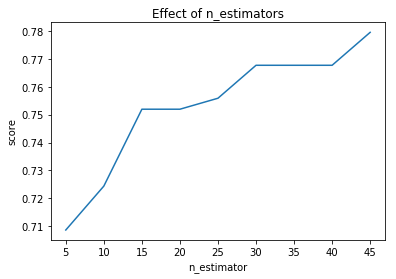

In [98]:

#changing the estimator to know at what point we get to the good accuracy
estimators = np.arange(5, 50, 5)
scores = []
for n in estimators:
    classifier = RandomForestClassifier(n_estimators = n,random_state=101)
    classifier.set_params(n_estimators=n)
    classifier.fit(X_train, y_train)
    #y_predict = regressor.predict(X_test)
    #print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
    scores.append(classifier.score(X_test, y_test))
    #print(n)
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [101]:
from sklearn.model_selection import KFold
from sklearn.cross_validation import cross_val_score, cross_val_predict
import xgboost

In [103]:
classifications = [
            ("Logistic Regression", LogisticRegression()),
            ("Decision Tree ",  DecisionTreeClassifier()),
            ("Random Forest",  RandomForestClassifier(n_estimators=30)),
            ("KNeighbour",  KNeighborsClassifier(19)),
            ("XGBoost", xgboost.XGBClassifier()),
             ("Linear Discriminant Analysis",LinearDiscriminantAnalysis()),
              ("Naive Bayes",GaussianNB())]

dFold = pd.DataFrame(index=['Test Accuracy'])
#classification=["Logistic Regression","Decision Tree","Random Forest","KNeighbour","XGBoost"]
#classifiers=[]
scoring = 'accuracy'
results=[]
names=[]
#kfold = KFold(n_splits=10, random_state=100)
for classifier_name,model in classifications:
    #kfold=KFold(n_splits=10,random_state=101)
    accuracy =cross_val_score(model, X_train,y_train, cv=10,scoring='accuracy').mean()
    dFold[classifier_name] =accuracy
    print(classifier_name,"\n\t Accuracy :", accuracy)
 # for box plot
fig=pyplot.figure()
fig.subtitle('Algorithm comparision')
ax=fig.add_subplot(111)
pyplot.boxplot(accuracy)
ax.set_xticklabels(classifier_name)
pyplot.show()

Logistic Regression 
	 Accuracy : 0.7743433222345543
Decision Tree  
	 Accuracy : 0.7041655994763654
Random Forest 
	 Accuracy : 0.7687583596573607
KNeighbour 
	 Accuracy : 0.7301723156606619
XGBoost 
	 Accuracy : 0.7650573436921938
Linear Discriminant Analysis 
	 Accuracy : 0.7706074447195423
Naive Bayes 
	 Accuracy : 0.7510358860525341


#### Regression Algorithms:
 Starting with four linear machine learning algorithms:
 
 Linear Regression:Linear regression assumes that the input variables have a Gaussian distribution. It is also assumed that input variables are relevant to the output variable and that they are not highly correlated with each other (a problem called collinearity)

 Ridge Regression:Ridge regression is an extension of linear regression where the loss function is modiﬁed to minimize the complexity of the model measured as the sum squared value of the coeﬃcient values (also called the L2-norm)

 LASSO Linear Regression:The Least Absolute Shrinkage and Selection Operator (or LASSO for short) is a modiﬁcation of linear regression, like ridge regression, where the loss function is modiﬁed to minimize the complexity of the model measured as the sum absolute value of the coeﬃcient values (also called the L1-norm).

 Elastic Net Regression:ElasticNet is a form of regularization regression that combines the properties of both Ridge Regression and LASSO regression. It seeks to minimize the complexity of the regression model (magnitude and number of regression coeﬃcients) by penalizing the model using both the L2-norm (sum squared coeﬃcient values) and the L1-norm (sum absolute coeﬃcient values).

Then looking at three nonlinear machine learning algorithms:

 k-Nearest Neighbors:The k-Nearest Neighbors algorithm (or KNN) locates the k most similar instances in the training dataset for a new data instance. From the k neighbors, a mean or median output variable is taken as the prediction. Of note is the distance metric used (the metric argument). The Minkowski distance is used by default, which is a generalization of both the Euclidean distance (used when all inputs have the same scale) and Manhattan distance (used when the scales of the input variables diﬀer)

 Classiﬁcation and Regression Trees:Decision trees or the Classiﬁcation and Regression Trees (CART as they are known) use the training data to select the best points to split the data in order to minimize a cost metric. The default cost metric for regression decision trees is the mean squared error, speciﬁed in the criterion parameter.

 Support Vector Machines:Support Vector Machines (SVM) were developed for binary classiﬁcation. The technique has been extended for the prediction real-valued problems called Support Vector Regression (SVR). Like the classiﬁcation example, SVR is built upon the LIBSVM library.


In [9]:
#1 : Peak Boston House Price Dataset :
filename="housing.csv"
names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df=pd.read_csv(filename,names=names,delim_whitespace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [ ]:
X=df.drop(columns='MEDV')
y=df['MEDV']

In [16]:
# A test harness with 10-fold cross-validation is used to demonstrate how to spot-check each machine learning 
#algorithm and mean squared error measures are used to indicate algorithm performance. Note that mean squared 
#error values are inverted (negative). This is a quirk of the cross val score() function used that requires all 
#algorithm metrics to be sorted in ascending order (larger value is better). 

In [15]:
Regression = [
            ("Linear Regression", LinearRegression()),
            ("Ridge Regression ",  Ridge()),
            ("Lasso Regression",  Lasso()),
            ("ElasticNet Regression",  ElasticNet()),
            ("KNN Regression ", KNeighborsRegressor()),
             ("Classficatin and Regression Trees",DecisionTreeRegressor()),
              ("Support Vector Machine ",SVR())]

kfold=KFold(n_splits=10,random_state=0)


dFold = pd.DataFrame(index=['Regressor Accuracy'])
scoring = 'neg_mean_squared_error'
results=[]
names=[]
#kfold = KFold(n_splits=10, random_state=100)
for regression_name,model in Regression:
    #kfold=KFold(n_splits=10,random_state=101)
    accuracy =cross_val_score(model, X,y, cv=10,scoring='neg_mean_squared_error').mean()
    dFold[regression_name] =accuracy
    print(regression_name,"\n\t Accuracy :", accuracy)

Linear Regression 
	 Accuracy : -34.70525594452489
Ridge Regression  
	 Accuracy : -34.07824620925929
Lasso Regression 
	 Accuracy : -34.46408458830232
ElasticNet Regression 
	 Accuracy : -31.164573714249762
KNN Regression  
	 Accuracy : -107.28683898039215
Classficatin and Regression Trees 
	 Accuracy : -38.086790196078425
Support Vector Machine  
	 Accuracy : -91.04782433324428
